The following code is from
[Link](https://github.com/justinbois/rdsolver/blob/master/notebooks/asdm_example.ipynb)

In [1]:
import numpy as np
import numba
import scipy.integrate
from matplotlib import pyplot as plt

import rdsolver

In [2]:
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

In [3]:
D

array([0.005, 0.2  ])

In [4]:
beta

array([0.  , 0.02])

In [5]:
gamma

array([[-0.01,  0.  ],
       [ 0.  ,  0.  ]])

In [6]:
#f()
# rho_a, rho_s, kappa_a
f_args

(0.01, 0.02, 0.25)

In [7]:
homo_ss

array([1.  , 1.25])

In [16]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

# Set up the space and time grid
n = (32, 32)
L = (50, 50)
t = np.linspace(0, 50000, 256)

# Include the estimated params
#D[0] = 0.03245668485760689 # D_a
#D[1] = 0.20000000298023224 # D_s
beta[0] = 0.00# sigma_a
beta[1] = 0.02217368# sigma_s
#gamma[0,0] = -0.39821332693099976/6.1620588302612305 #mu_a
#gamma[1,1] = 0.0 #mu_s
# rho_a,  rho_s, kappa_a
#f_args = (0.3968598246574402/6.1620588302612305, 0.01892107166349888, 0.25294479727745056)
f_args = (f_args[0], f_args[1], 0.19742522)


# Initial condition and solve
c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
c_interp = rdsolver.viz.interpolate_concs(c)

100%|██████████| 256/256 [00:04<00:00, 53.96it/s]


In [8]:
#with open('../turing.npy', 'wb') as f:
#    np.save(f, c)
    
#with open('../turing_t.npy', 'wb') as f:
#    np.save(f, t)
   

100%|██████████| 256/256 [00:26<00:00,  9.62it/s]


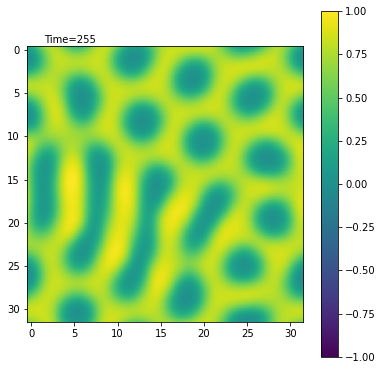

In [19]:
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])


title = ax.text(1.5,-0.85, "Time=0")

#im=plt.imshow((c_interp[0, :,:,0]- np.min(c_interp[0, :,:,0]))/(np.max(c_interp[0, :,:,0]) - np.min(c_interp[0, :,:,0])))#  ,interpolation='none')
im=plt.imshow((c[0, :,:,0]- np.min(c[0, :,:,0]))/(np.max(c[0, :,:,0]) - np.min(c[0, :,:,0])))#  ,interpolation='none')
fig.colorbar(im)
plt.clim(-1, 1)
pbar = tqdm(total=len(t))

def init():
    im.set_data((c_interp[0, :,:,0]- np.min(c_interp[0, :,:,0]))/(np.max(c_interp[0, :,:,0]) - np.min(c_interp[0, :,:,0])))
    #im.set_data(c[0, :,:,0])
    title.set_text(f"Time={0}")
    plt.clim(-1, 1)
    return [im, title]
    
def animate(i):    
    a=im.get_array()
    a=c_interp[0, :,:,i] 
    im.set_data((c_interp[0, :,:,i]- np.min(c_interp[0, :,:,i])) /(np.max(c_interp[0, :,:,i]) - np.min(c_interp[0, :,:,i])))
    #im.set_data(c[0, :,:,i])
    title.set_text(f"Time={i}")
    plt.clim(-1, 1)
    #fig.colorbar(im)
    pbar.update(1)
    if i+1 >= len(t):
        pbar.close()
    return [im, title]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=10, blit=True)


anim.save('turring_2.gif', writer='imagemagick')

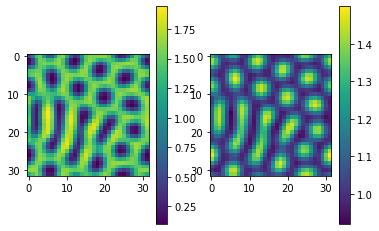

In [17]:
# Direct solution
index = -1#len(t)-1



plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

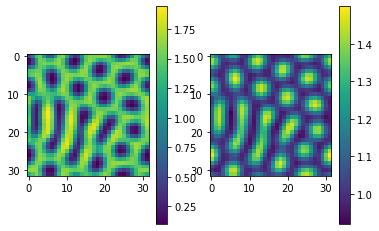

In [18]:
# Direct solution
index = -1#len(t)-1
plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

### Making an animation

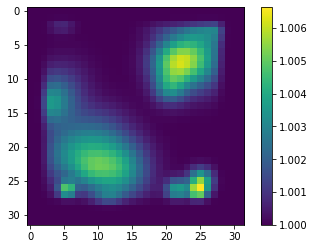

In [27]:
im= plt.imshow(c[0, :,:,0])
bar = plt.colorbar()
plt.show()

In [19]:
bar

In [ ]:
beta[0] = 0.00# sigma_a
beta[1] = 0.02217368# sigma_s
#gamma[0,0] = -0.39821332693099976/6.1620588302612305 #mu_a
#gamma[1,1] = 0.0 #mu_s
# rho_a,  rho_s, kappa_a
#f_args = (0.3968598246574402/6.1620588302612305, 0.01892107166349888, 0.25294479727745056)
f_args = (f_args[0], f_args[1], 0.19742522)